In [1]:
import numpy as np
import pyDR as DR
from pyDR.Project import Project
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pickle

In [2]:
ile_resn = [3, 13, 23, 30, 36, 44, 61]
test_list = ["test_001", "test_002", "test_003", "test_004", "test_008", "test_010", "test_011"]

In [3]:
data = []
for test in test_list:
    out=pickle.load(open("./out_figures/ile/"+test+"/out2.p", 'rb'))
    data.append(out)

In [4]:
data[0][-1]["ct_prod"].shape

(42, 200000)

In [6]:
tf=200000
t=np.arange(tf>>1)*.005

In [15]:
def creat_split_plots(out, save=None, show=True):    
    titles=[['Methyl rot.',r'$\chi_2$ rot.',r'$\chi_1$ rot.',r'C$\alpha$-C$\beta$ motion','Total'],
                ['Methyl rot.',r'$\chi_2$ rot.',r'$\chi_1$ rot.',r'C$\alpha$-C$\beta$ motion','Total'],
                ['Methyl lib.','Methyl hop.',r'$\chi_2$ lib.',r'$\chi_2$ hop.',
                r'$\chi_1$ lib.',r'$\chi_1$ hop.',r'C$\alpha$-C$\beta$ motion','Total']]
    fig=plt.figure('Methyl Dynamics')
    fig.clear()
    fig.set_size_inches([10.27,  9.03])
    ax=[]
    ax.append([fig.add_subplot(5,3,k+1) for k in range(0,15,3)])
    ax.append([fig.add_subplot(5,3,k+1) for k in range(1,15,3)])
    ax.append([fig.add_subplot(5,6,k+1) for k in [4,5,10,11,16,17,22]])
    ax[-1].append(fig.add_subplot(5,3,15))

    for a0,t0 in zip(ax,titles):
        for a, title in zip(a0,t0):
            a.set_title(title)

    i = 0
    j = 0
    for inc,ax0 in zip(range(3),ax):
        i += 1 
        out_include = out[inc]       
        for ct,a in zip(out_include['ct_finF'],ax0):
            j += 1
            try:
                a.cla()
                a.plot(t,ct.mean(0)[:tf>>1])
                a.set_ylim([0,1.05])
                S2=ct.mean(0)[tf>>2:tf>>1].mean()
                b=np.argwhere(ct.mean(0)-S2<0)[0,0]
                #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
                tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
                fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
                S2,tc=least_squares(fun,[S2,tc0]).x
                a.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
                a.set_xlim([0,50*tc])
                #a.set_xlim([0,np.min([10*tc, out['t'][:tf>>1]])])
                a.set_title(f"{i}-{j}")
            except:
                pass
        ax0[-1].semilogx(out_include['t'][:tf>>1],out_include['ct'].mean(0)[:tf>>1])
        ax0[-1].semilogx(out_include['t'][:tf>>1],out_include['ct_prod'].mean(0)[:tf>>1])
        ax0[-1].set_ylim([0,.5])
        
    fig.set_size_inches([180/25.4,220/25.4])

    if save:
        plt.savefig("./out_figures/ile/"+save+"/split_plot.pdf")

    if show:
        plt.show()
    else:
        plt.close()

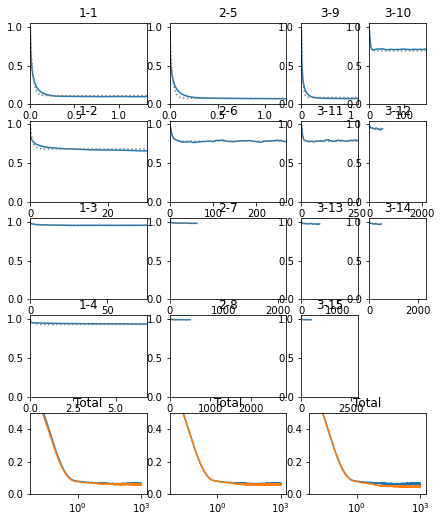

In [13]:
creat_split_plots(data[0])

In [16]:
for d, name in zip(data, test_list):
    creat_split_plots(d, save=name, show=False)

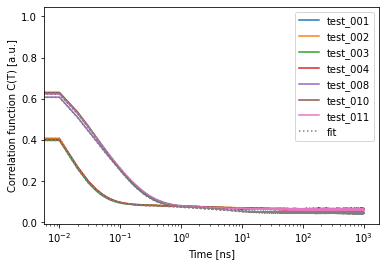

In [19]:
for out in [x[-1] for x in data]:
        plt.semilogx(out['t'][:tf>>1],out['ct'].mean(0)[:tf>>1])
for out in [x[-1] for x in data]:
        plt.semilogx(out['t'][:tf>>1],out['ct_prod'].mean(0)[:tf>>1],color='grey',linestyle=':')
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Total Correlation Function")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot00.png")

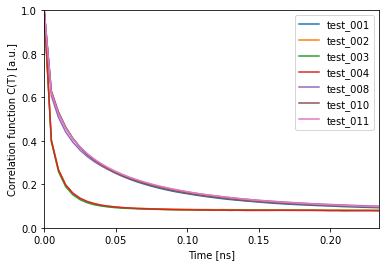

In [65]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][0]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][0]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of methyl rotations")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot01.png")

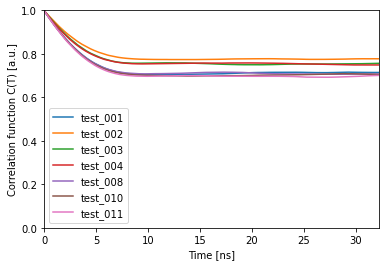

In [66]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][1]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][1]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi2")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot02.png")

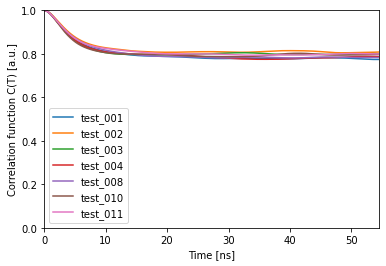

In [67]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][2]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][2]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0, 10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi1")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot03.png")

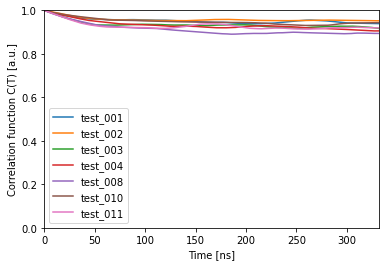

In [68]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][3]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][3]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0, 10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of the backbone")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot04.png")

In [47]:
ile_test_list_3 = [x+"_ile3" for x in test_list]

In [48]:
ile_test_list_44 = [x+"_ile44" for x in test_list]

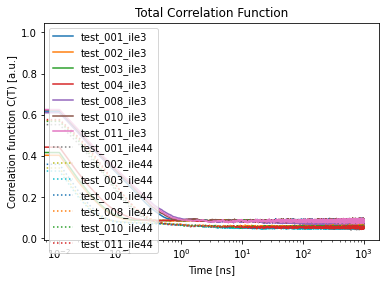

In [52]:
for out in [x[-1] for x in data]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][0:6].mean(0)[:tf>>1])
for out in [x[-1] for x in data]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function")
plt.legend(ile_test_list_3+ile_test_list_44)
plt.savefig("./out_figures/report/plot_ile.png")

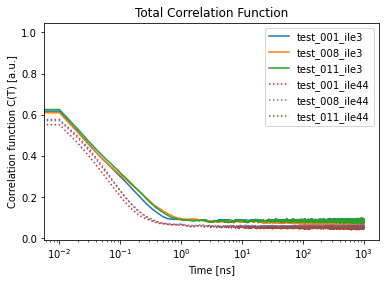

In [59]:
picks=[0,-3,-1]
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][0:6].mean(0)[:tf>>1])
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function")
plt.legend([ile_test_list_3[x] for x in picks]+[ile_test_list_44[x] for x in picks])
plt.savefig("./out_figures/report/plot_ile.png")

In [ ]:
res_lsq_list = []
for i in range(4):
    asdf = []
    for out in data:
        ct = out['ct_finF'][i]
        S2=ct.mean(0)[tf>>2:tf>>1].mean()
        b=np.argwhere(ct.mean(0)-S2<0)[0,0]
        #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
        tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
        fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
        res_lsq = least_squares(fun,[S2,tc0])
        S2,tc=res_lsq.x
        asdf.append([S2, tc])
        print(S2, tc)
    res_lsq_list.append(asdf)

In [ ]:
for i in res_lsq_list[2]:
   print(f" & {i[0]:.5f} & {i[1]:.5f}")

In [ ]:
for i in res_lsq_list[1]:
   print(f" & {i[0]:.5f} & {i[1]:.5f}")

In [ ]:
res_lsq_matrix=np.array(res_lsq_list)

In [ ]:
res_lsq_matrix

In [ ]:
res_lsq_matrix[:,0]

In [ ]:
test_0_res_lsq = res_lsq_matrix[:,0]

In [ ]:
for i in range(4):
    line = res_lsq_matrix[:,i]
    print(f"test_{i+1} & {line[0,1]:.5f} & {line[1,1]:.5f} & {line[2,1]:.5f} & {line[3,1]:.5f} \\")

In [ ]:
for i in range(4):
    line = res_lsq_matrix[:,i]
    print(f"test_{i+1} & {line[0,0]:.5f} & {line[1,0]:.5f} & {line[2,0]:.5f} & {line[3,0]:.5f}")

In [ ]:
res_lsq_matrix[0,0]

In [ ]:
line = res_lsq_matrix[:,0]
for S2, tc in line:
    t=np.linspace(0,0.1,100)
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc))
plt.legend(["0","1","2","3"])
plt.show()

In [ ]:
print(f"# test & t_c(methyl)[ns] & t_c(\chi2)[ns] & t_c(\chi1)[ns] & t_c(backbone)[ns] \\\\ \\hline ")
for i in range(4):
    line = res_lsq_matrix[:,i]
    s = 1000
    print(f"test_{i+1} & {s*line[1,1]:.2f} & {s*line[0,1]:.2f} & {s*line[2,1]:.2f} & {s*line[3,1]:.0f} \\\\")
print("\n\n")
print(f"# test & S^2(methyl) & S^2(\chi2) & S^2(\chi1) & S^2(backbone) \\\\ \\hline")
for i in range(4):
    line = res_lsq_matrix[:,i]
    print(f"test_{i+1} & {line[1,0]:.5f} & {line[0,0]:.5f} & {line[2,0]:.5f} & {line[3,0]:.5f} \\\\")

In [ ]:
len(res_lsq_list)

In [ ]:
res_lsq = res_lsq_list[0]

In [ ]:
res_lsq

In [ ]:
res_lsq_list